In [10]:
import pandas as pd
from collections import Counter
import nltk
import matplotlib
import matplotlib.pyplot as plt

file = pd.read_csv("Direct_Messages_-_Private_-_Dragonite_365635143462944778.csv")
file.drop("AuthorID", inplace=True, axis = 1)
file.dropna(subset=["Content"], inplace=True)
file

,Author,Date,Content,Attachments,Reactions
0,Vincente#0733,10/06/2017 2:45 PM,Started a call that lasted 0 minutes.,NaN,NaN
1,Vincente#0733,10/07/2017 1:27 PM,Started a call that lasted 0 minutes.,NaN,NaN
2,Dragonite#7048,03/07/2018 11:39 PM,https://discord.gg/Mf8pxx,NaN,NaN
3,Dragonite#7048,03/17/2018 3:28 PM,https://discord.gg/6Q86fC,NaN,NaN
4,Vincente#0733,04/01/2018 10:44 PM,yo josh. you started the science project?,NaN,NaN
...,...,...,...,...,...
1244,Dragonite#7048,02/10/2023 1:04 PM,I just said the next step was creating the des...,NaN,NaN
1245,Vincente#0733,02/10/2023 1:04 PM,okay cuz if you look at the rubric that shit i...,NaN,NaN
1246,Dragonite#7048,02/10/2023 1:05 PM,dayum I didn't write a lot,NaN,🐒 (1)
1247,Vincente#0733,02/10/2023 1:05 PM,like it's the section with the most amount of ...,NaN,NaN


          Frequency
Word               
'               108
yo               73
u                50
like             50
=                42
idk              33
yea              30
v                29
shit             29
know             28
call             27
k                27
cuz              26
oh               26
started          25
yeah             25
lasted           23
minutes.         23
get              23
?                22
ok               21
im               21
wtf              19
lmao             19
+                19
think            18
ye               17
one              17
parshan          17
add              16
going            16
wait             15
fuck             14
go               14
damn             14
josh             13
ur               13
r                13
tell             13
right            13
0                12
dude             12
back             12
work             12
nah              12
good             12
got              12
’                12


<Axes: xlabel='Word'>

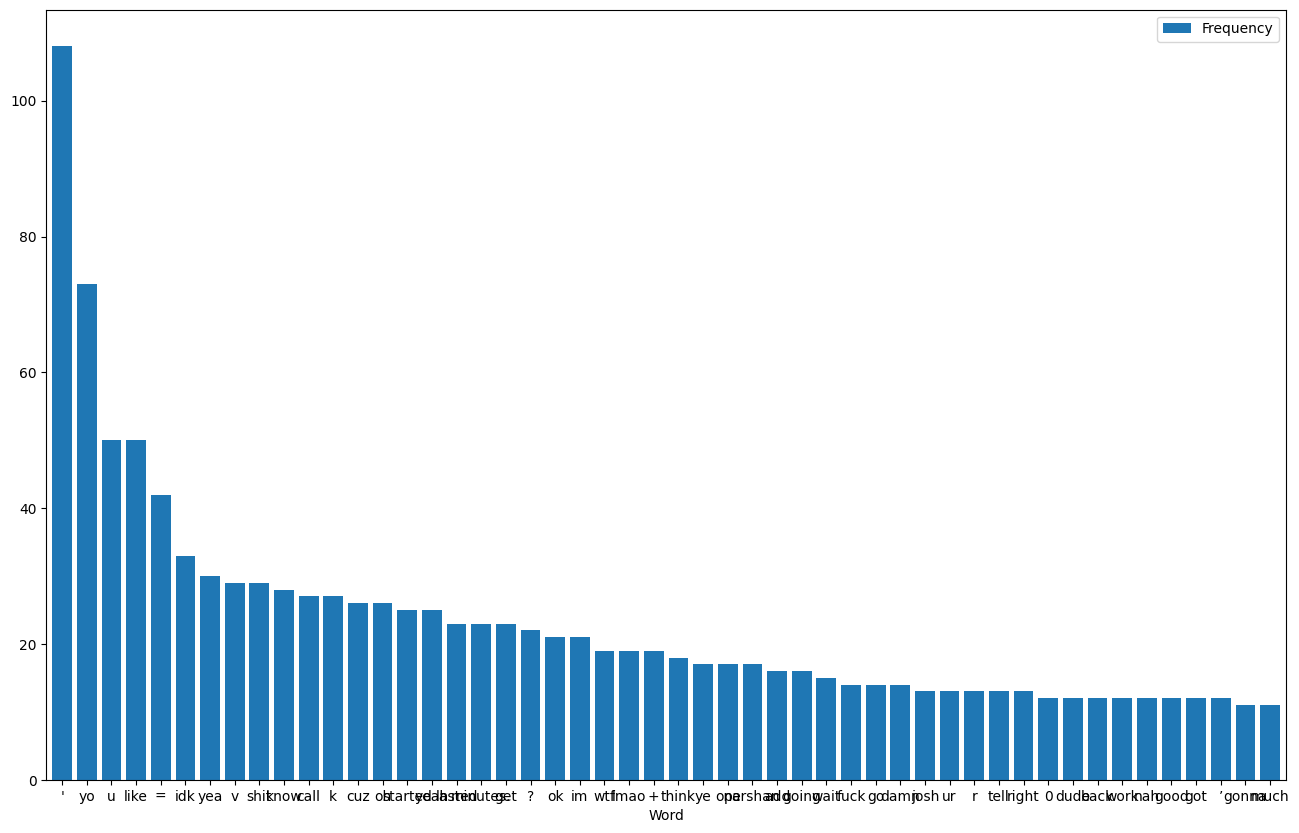

In [11]:
stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (file.Content
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(50),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)